In [3]:
import numpy as np
import matplotlib.pyplot as plt
from micrograd.comp_graph import draw_dot

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

%matplotlib inline

In [2]:
X_T = [[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
       [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]]

y_T = [[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]


NameError: name 'y' is not defined

In [4]:
def T(x:list[list]):
    """Transpose a matrix represented as a list of lists."""
    tx = []
    for jcol in range(len(x[0])):
        row = []
        for irow in range(len(x)):
            row.append(x[irow][jcol])
        tx.append(row)
    return tx

def shape(x):
    return (len(x), len(x[0])) if x else (0, 0)

X = T(X_T)
y = T(y_T)

print("X shape:", shape(X))
print("y shape:", shape(y))


X shape: (10, 2)
y shape: (10, 2)


In [5]:
groups = ['2'.join(list(map(str, yrow))) for yrow in y]  # 4 classes
groups = list(map(int, groups))
hash = {v:k for k, v in enumerate(set(groups))}
groups = [hash[g] for g in groups]
groups

[0, 0, 0, 2, 2, 1, 1, 1, 3, 3]

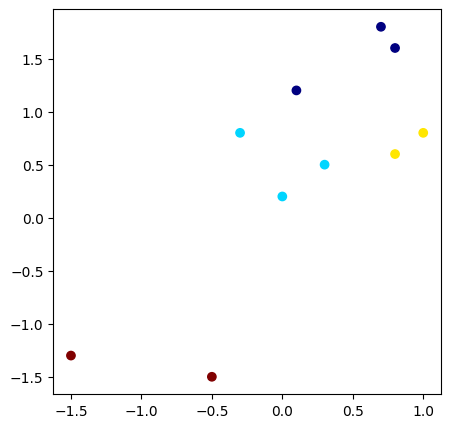

In [6]:
# visualize in 2D
plt.figure(figsize=(5,5))
xp = np.array(X)
plt.scatter(xp[:,0], xp[:,1], c=groups, cmap='jet')
plt.show()

In [7]:
# initialize a model
# remember that x had 2 features and so our input layer must have 2 neurons
model = MLP(2, [12, 2], nonlin='sigmoid') # 2-layer neural network
print("number of parameters", len(model.parameters()))
print(model)


number of parameters 62
MLP of [
Layer of [sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2)],
Layer of [linearNeuron(in:12), linearNeuron(in:12)]
]


In [10]:
# loss function
def loss():
    """Forward pass, then return loss and accuracy."""
    # forward pass
    # call the model on the inputs. Note the model is being called and passed each row of X (with 2 features)
    output = list(map(model, X))
    
    # calculate the loss
    losses = [(output[i][0] - y[i][0])**2 + (output[i][1] - y[i][1])**2 for i in range(len(y))]
    data_loss = sum(losses) * (1.0 / len(losses))    

    # also get accuracy
    threshold = 0.5
    accuracy = []
    for yrow, predrow in zip(y, output):
        # accuracy.extend(
        #     [(ycol > 0) == (predcol.data > threshold) for ycol, predcol in zip(yrow, predrow)]
        # )
        t1 = [(ycol > 0) == (predcol.data > threshold) for ycol, predcol in zip(yrow, predrow)]
        t2 = [elm == 2 for elm in t1]
        
    return data_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, f'| accuracy={acc}')

Value(data=6.08114710734241, grad=0) | accuracy=0.45


In [ ]:
# print(total_loss.debug())
# total_loss.backward()
# draw_dot(total_loss)

In [104]:
# training loop
epochs = 100
lr = 0.01
tr_loss = []

for epoch in range(epochs+1):
    # calculate forward pass, loss, accuracy
    total_loss, acc = loss()
    tr_loss.append(total_loss.data)
    print(f'epoch {epoch} | loss={total_loss.data} | accuracy={acc*100:.1f}')
    
    if epoch == epochs:
        # This is used to get the latest accuracy and loss at the end of training
        break

    # backpropagation
    model.zero_grad()
    # note that even though we have 2 outputs, the total loss is just one Value object
    total_loss.backward()
    
    # update weights
    for p in model.parameters():
        p.data -= p.grad * lr
    

epoch 0 | loss=7.351369076004838 | accuracy=45.0
epoch 1 | loss=6.231570724024772 | accuracy=45.0
epoch 2 | loss=5.3022459918964415 | accuracy=40.0
epoch 3 | loss=4.5293539354658625 | accuracy=40.0
epoch 4 | loss=3.885378399762958 | accuracy=45.0
epoch 5 | loss=3.34795159858524 | accuracy=50.0
epoch 6 | loss=2.898802917403605 | accuracy=50.0
epoch 7 | loss=2.5229468548585796 | accuracy=55.0
epoch 8 | loss=2.2080491628109273 | accuracy=60.0
epoch 9 | loss=1.9439274439274206 | accuracy=65.0
epoch 10 | loss=1.7221543914066189 | accuracy=65.0
epoch 11 | loss=1.5357402336283152 | accuracy=65.0
epoch 12 | loss=1.3788769074375709 | accuracy=65.0
epoch 13 | loss=1.2467307771895182 | accuracy=60.0
epoch 14 | loss=1.1352738460734166 | accuracy=50.0
epoch 15 | loss=1.0411457136810303 | accuracy=50.0
epoch 16 | loss=0.9615402542961178 | accuracy=50.0
epoch 17 | loss=0.8941122871518232 | accuracy=55.0
epoch 18 | loss=0.8369004974370337 | accuracy=55.0
epoch 19 | loss=0.7882636262957814 | accuracy=5

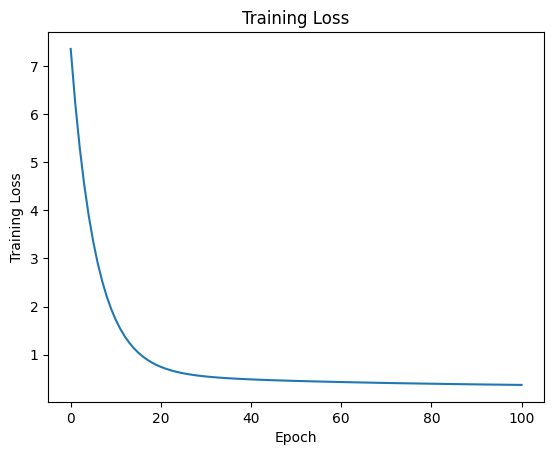

In [107]:
# plot loss vs epochs
plt.plot(tr_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()

In [117]:
# visualize decision boundary

h = 0.25
xp = np.array(X)
yp = np.array(y)
x_min, x_max = xp[:, 0].min() - 1, xp[:, 0].max() + 1
y_min, y_max = xp[:, 1].min() - 1, xp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
# inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, Xmesh))

# making the predictions into one class
scores = [[float(s.data) for s in score] for score in scores]

Z = ['2'.join(list(map(str, yrow))) for yrow in y]  # 4 classes
# groups = list(map(int, groups))
# hash = {v:k for k, v in enumerate(set(groups))}
# groups = [hash[g] for g in groups]
# groups

# Z = np.array([s.data > 0 for s in scores])


[[-0.16153156527156687, 0.8964643959246286],
 [-0.11539432723295706, 0.9164439985177993],
 [-0.06738854904554692, 0.9349493593520378],
 [-0.018144916596484317, 0.9520308694393946],
 [0.03156558263473008, 0.9679501365748777],
 [0.08086151948564946, 0.9831552281359175],
 [0.1288068343280716, 0.9982154457376698],
 [0.174489255854141, 1.0137230568260733],
 [0.217109311403632, 1.0301791643922025],
 [0.2560611115334946, 1.0478875988183378],
 [0.29098489319895554, 1.0668814563508757],
 [0.32177748776545845, 1.086900368547947],
 [0.34855884078612215, 1.1074240863643867],
 [0.3716058091233576, 1.1277534152142228],
 [0.3912732111781168, 1.147118005387982],
 [0.40792308311046244, 1.1647859024047604],
 [0.4218767325460262, 1.1801530111021388],
 [0.4333942351436148, 1.192799415763898],
 [-0.17329103408368374, 0.8619270478355635],
 [-0.12713190005285702, 0.8841480012370084],
 [-0.07867816442690834, 0.9054320202750027],
 [-0.028539701884611413, 0.925701008227994],
 [0.022521652913679358, 0.9450507213

In [113]:

Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


AttributeError: 'list' object has no attribute 'data'